In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio as rst
from rasterio.mask import mask
import geopandas as gpd

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import warnings
warnings.filterwarnings("ignore")

In [2]:
dpsvim_f = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/florestalDPSVIm_reindex.csv')
dpsvim_s = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/savanicaDPSVIm_reindex.csv')
dpsvim_c = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/campestreDPSVIm_reindex.csv')

In [3]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [4]:
month_season_detector(dpsvim_f)
month_season_detector(dpsvim_s)
month_season_detector(dpsvim_c)

In [5]:
red_circle = dict(markerfacecolor='red', marker='o', markersize=10, markeredgecolor='white')

pink_patch = dict(facecolor='pink', color='k')
blue_patch = dict(facecolor='lightblue', color='k')
green_patch = dict(facecolor='lightgreen', color='k')
orange_patch = dict(facecolor='orange', color='k')
yellow_patch = dict(facecolor='yellow', color='k')

median_patch = dict(color='red')

In [6]:
dpsvim_f_dict = {'wet': dpsvim_f.loc[dpsvim_f['season']=='wet']['median'].values, 'dry': dpsvim_f.loc[dpsvim_f['season']=='dry']['median'].values}
dpsvim_s_dict = {'wet': dpsvim_s.loc[dpsvim_s['season']=='wet']['median'].values, 'dry': dpsvim_s.loc[dpsvim_s['season']=='dry']['median'].values}
dpsvim_c_dict = {'wet': dpsvim_c.loc[dpsvim_c['season']=='wet']['median'].values, 'dry': dpsvim_c.loc[dpsvim_c['season']=='dry']['median'].values}

In [7]:
rain = pd.read_csv('D:/thesis_data/pluviometric_data/pluviometric_data_PNB_paper_01.csv', sep=',')

month_season_detector(rain)

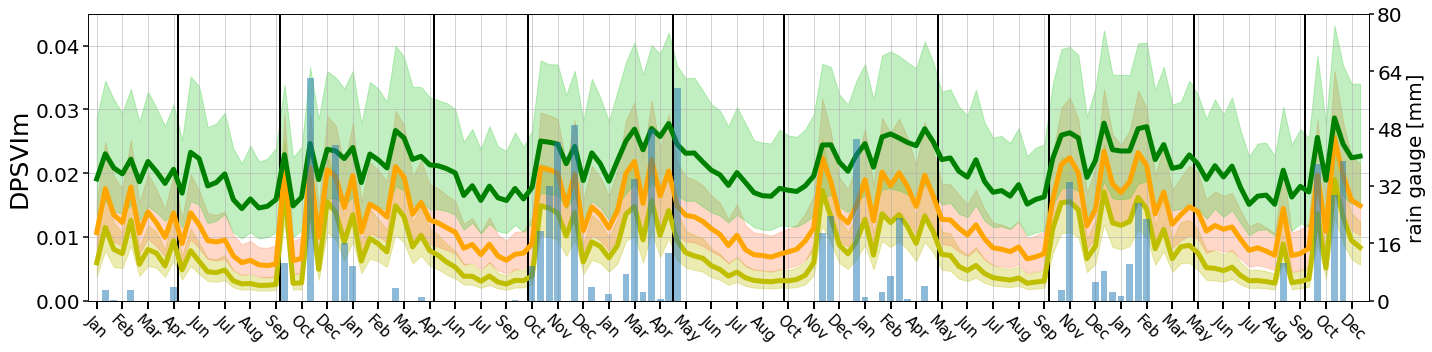

In [30]:
label_size = 20

x = dpsvim_f.index

y_f = dpsvim_f
y_s = dpsvim_s
y_c = dpsvim_c

fig, ax = plt.subplots(figsize=(20,5))

ax.vlines(x[9] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, y_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, y_c['percentile_25'], y_c['percentile_75'], alpha=0.3, color='y')

ax.plot(x, y_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, y_s['percentile_25'], y_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, y_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, y_f['percentile_25'], y_f['percentile_75'], alpha=0.3, color='limegreen')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=y_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 0.045])
ax.set_xlim([-1, 149])
ax.set_ylabel('DPSVIm', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/dpsvim_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

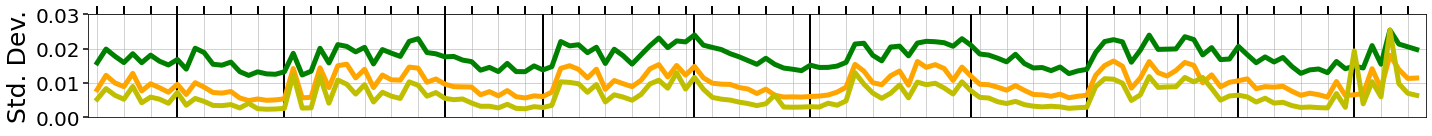

In [31]:
label_size = 20

x = dpsvim_f.index

fig, ax = plt.subplots(figsize=(20,2))

ax.vlines(x[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, dpsvim_f['std'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.plot(x, dpsvim_s['std'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.plot(x, dpsvim_c['std'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')

ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=dpsvim_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 0.03])
ax.set_xlim([-1, 149])
ax.set_ylabel('Std. Dev.', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=5)
ax.grid(True, alpha=0.7)

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/dpsvim_std.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

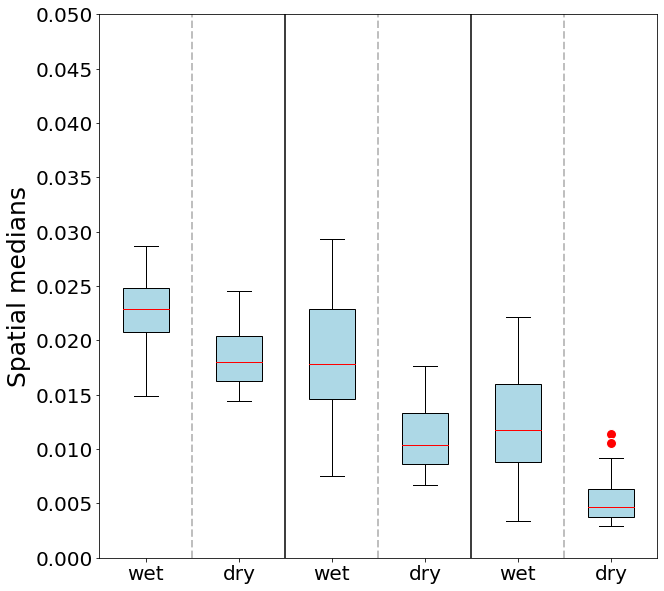

In [10]:
dpsvim_f_dict = {'wet': dpsvim_f.loc[dpsvim_f['season']=='wet']['median'].values, 'dry': dpsvim_f.loc[dpsvim_f['season']=='dry']['median'].values}
dpsvim_s_dict = {'wet': dpsvim_s.loc[dpsvim_s['season']=='wet']['mean'].values, 'dry': dpsvim_s.loc[dpsvim_s['season']=='dry']['mean'].values}
dpsvim_c_dict = {'wet': dpsvim_c.loc[dpsvim_c['season']=='wet']['mean'].values, 'dry': dpsvim_c.loc[dpsvim_c['season']=='dry']['mean'].values}

fig, ax = plt.subplots(figsize=(10, 10))

ax.vlines(1.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(2.5, ymin=0, ymax=1.5, colors='k')
ax.vlines(3.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(4.5, ymin=0, ymax=1.5, colors='k')
ax.vlines(5.5, ymin=0, ymax=1.5, colors='grey', linewidth=2, linestyle='--', alpha=0.5)

ax.boxplot([dpsvim_f_dict['wet'], dpsvim_f_dict['dry'], dpsvim_s_dict['wet'], dpsvim_s_dict['dry'], dpsvim_c_dict['wet'], dpsvim_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=blue_patch, medianprops=median_patch)
ax.set_ylim([0, 0.05])
ax.set_xticklabels(labels=['wet', 'dry', 'wet', 'dry', 'wet', 'dry'], fontdict={'fontsize': 20})
ax.locator_params(axis='y', nbins=12)
ax.set_ylabel('Spatial medians', fontsize=25)
ax.tick_params(axis='y', labelsize=20)

# plt.savefig('C:/Users/jales/Desktop/dpsvim_boxplots.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

In [68]:
water = gpd.read_file('D:/thesis_data/ROI/classes/agua_10m_32723.geojson')
water = [geom for geom in water.geometry]

with rst.open('D:/thesis_data/VEG_INDICES/raster/20201222T084517.tif') as raster:
    image, _ = mask(raster, water, invert=True, nodata=np.nan)

    dpsvim = image[3]

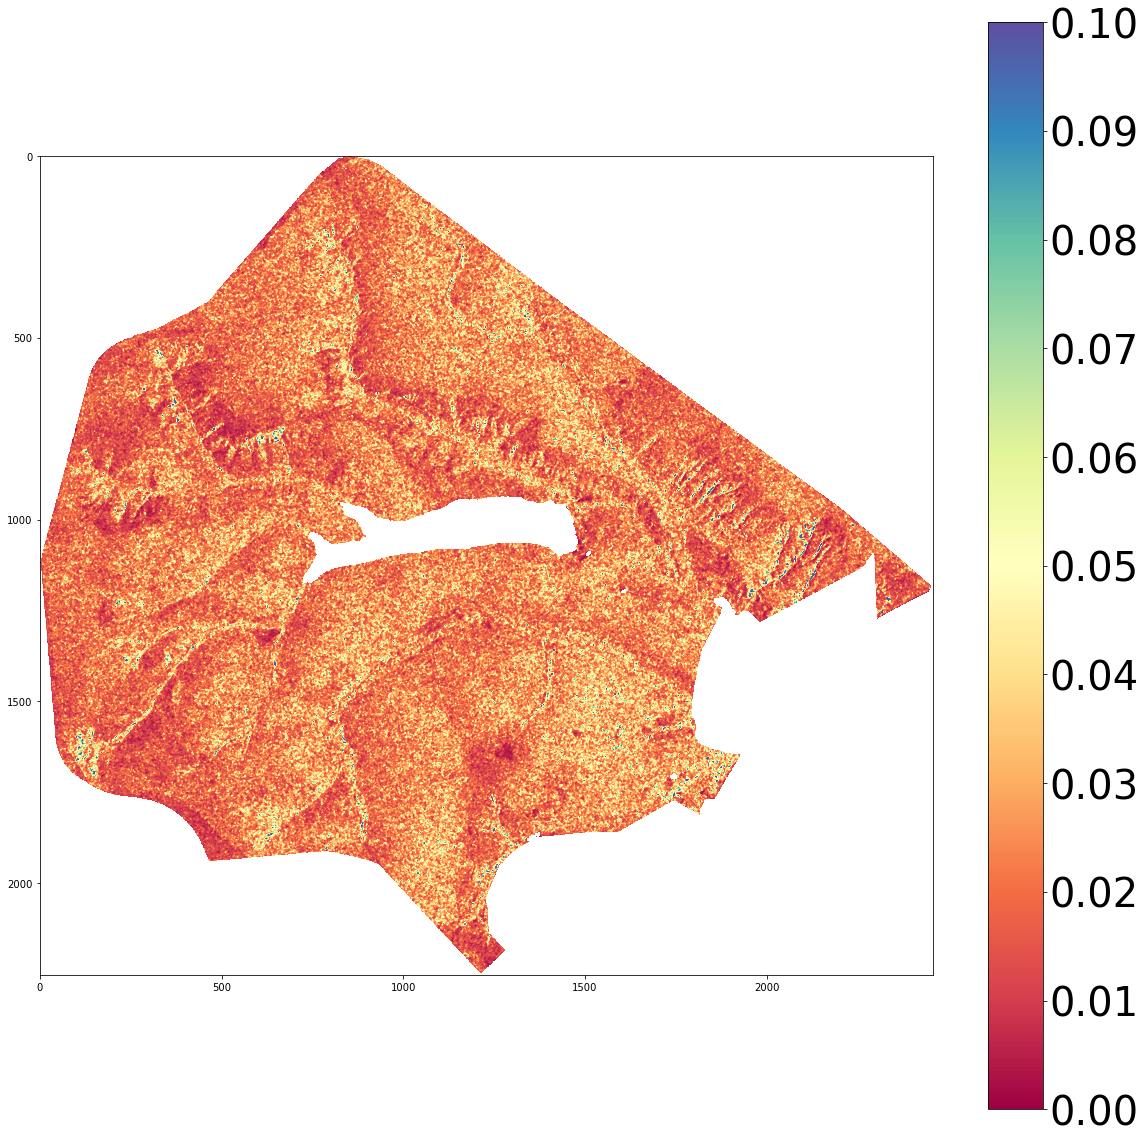

In [69]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(dpsvim, cmap='Spectral', vmin=0, vmax=0.1)

norm = Normalize(vmin=0, vmax=0.1)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='Spectral'), ax=ax, location='right')
cbar.ax.tick_params(labelsize=40)
cbar.ax.locator_params(axis='y', nbins=10)

plt.savefig('C:/Users/jales/Desktop/dpsvim_wet.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [63]:
import matplotlib.pyplot as plt
import rioxarray as rxr 
from shapely.geometry import mapping
import geopandas as gpd

In [18]:
# Open vector layer
florestal_path = 'D:/thesis_data/ROI/classes/form_florestal_30m_32723_buffer.geojson'
savanica_path = 'D:/thesis_data/ROI/classes/form_savanica_30m_32723_buffer.geojson'
campestre_path = 'D:/thesis_data/ROI/classes/form_campestre_30m_32723_buffer.geojson'

In [19]:
# Clip raster para cada classe vectorial de interesse
crop_savanica = gpd.read_file(savanica_path)
crop_campestre = gpd.read_file(campestre_path)
crop_florestal = gpd.read_file(florestal_path)

In [42]:
raster = rxr.open_rasterio('D:/thesis_data/VEG_INDICES/raster/20201222T084517.tif', masked=True)
dpsvim = raster.sel(band=4) # Seleção da banda

# 20210714T084530.tif

In [43]:
florestal_dpsvim = dpsvim.rio.clip(crop_florestal.geometry.apply(mapping))
savanica_dpsvim = dpsvim.rio.clip(crop_savanica.geometry.apply(mapping))
campestre_dpsvim = dpsvim.rio.clip(crop_campestre.geometry.apply(mapping))

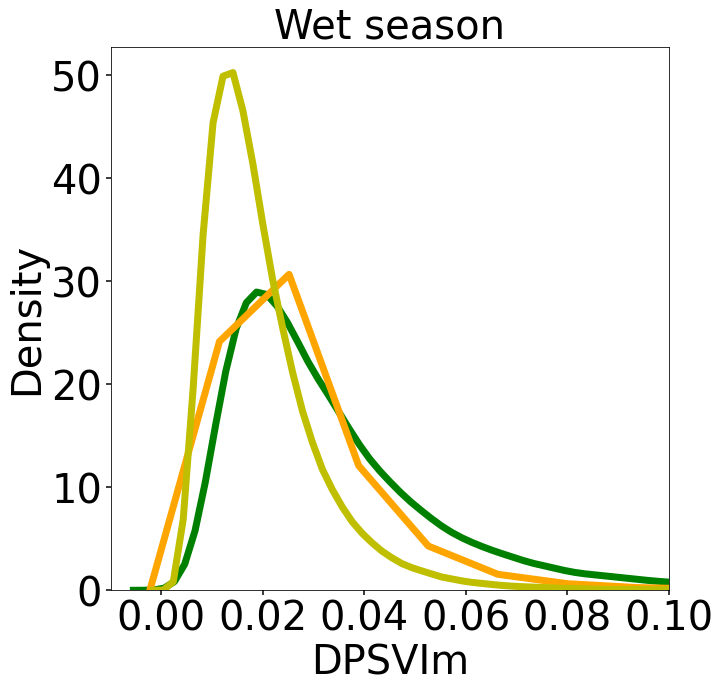

In [44]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

bins = 1500

sns.distplot(florestal_dpsvim, bins=bins, hist=False, color='green', kde_kws={'linewidth': 7}, label='Forest')
sns.distplot(savanica_dpsvim, bins=bins, hist=False, color='orange', kde_kws={'linewidth': 7}, label='Savanna')
sns.distplot(campestre_dpsvim, bins=bins, hist=False, color='y', kde_kws={'linewidth': 7}, label='Grassland')

ax.set_title('Wet season', fontdict={'fontsize':40})
ax.set_ylabel('Density', fontsize=40)
ax.set_xlim([-0.01, 0.1])
#ax.set_ylim([0, 1.8])
ax.set_xlabel('DPSVIm', fontsize=40)
ax.tick_params(axis='y', length=5, width=1.5, labelsize=40)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=40)
ax.locator_params(axis='x', nbins=6)

#fig.legend(fontsize=25, loc='upper right')

plt.savefig('C:/Users/jales/Desktop/dpsvim_dists_wet.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)